In [1]:
import pandas as pd
import numpy  as np

In [2]:
df = pd.read_csv('b.csv', encoding='latin-1')

In [3]:
df.head()

,S.No.,Review,Rating
0,1,nice hotel expensive parking got good deal sta...,4
1,2,ok nothing special charge diamond member hilto...,2
2,3,nice rooms not 4* experience hotel monaco seat...,3
3,4,unique \tgreat stay \twonderful time hotel mon...,5
4,5,great stay great stay \twent seahawk game awes...,5


## creating a function that will give the compound score of each text

In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/kanhaiya/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
analyzer  =   SentimentIntensityAnalyzer()

def compound_score_text(text):
    return analyzer.polarity_scores(text)['compound']

def sentiments_converter(score):
    stmt = ''
    if score >= 0.5:
        stmt = 'positive'
    elif score <= -0.5:
        stmt = 'negative'
    else:
        stmt = 'neutral'
    return stmt

## Checking the info of columns

In [7]:
df['Review'] = df['Review'].astype('str')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   S.No.   20491 non-null  int64 
 1   Review  20491 non-null  object
 2   Rating  20491 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 480.4+ KB


In [9]:
polarity_scores  =  df['Review'].apply(compound_score_text)
df['sentiment_score'] = polarity_scores

df['sentiment']  =  df['sentiment_score'].apply(sentiments_converter)

## Saving the new dataset

In [10]:
df.to_csv('Trip_adv_sentiment', index= False)

In [11]:
df.head()

,S.No.,Review,Rating,sentiment_score,sentiment
0,1,nice hotel expensive parking got good deal sta...,4,0.9747,positive
1,2,ok nothing special charge diamond member hilto...,2,0.9787,positive
2,3,nice rooms not 4* experience hotel monaco seat...,3,0.9889,positive
3,4,unique \tgreat stay \twonderful time hotel mon...,5,0.9912,positive
4,5,great stay great stay \twent seahawk game awes...,5,0.9797,positive


In [12]:
df['sentiment'].value_counts()

sentiment
positive    18263
negative     1162
neutral      1066
Name: count, dtype: int64

## Loading data

In [13]:
data  =  pd.read_csv('Trip_adv_sentiment')
data.head()

,S.No.,Review,Rating,sentiment_score,sentiment
0,1,nice hotel expensive parking got good deal sta...,4,0.9747,positive
1,2,ok nothing special charge diamond member hilto...,2,0.9787,positive
2,3,nice rooms not 4* experience hotel monaco seat...,3,0.9889,positive
3,4,unique \tgreat stay \twonderful time hotel mon...,5,0.9912,positive
4,5,great stay great stay \twent seahawk game awes...,5,0.9797,positive


In [14]:
data.isnull().sum()

S.No.              0
Review             0
Rating             0
sentiment_score    0
sentiment          0
dtype: int64

# EDA

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: xlabel='sentiment', ylabel='count'>

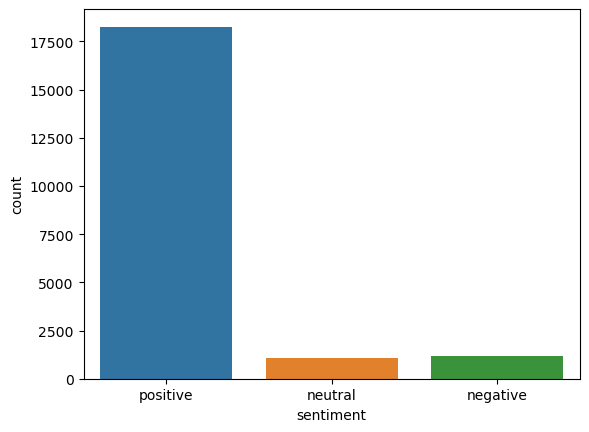

In [16]:
sns.countplot(data = data, x = data['sentiment'])

<Axes: xlabel='sentiment', ylabel='Rating'>

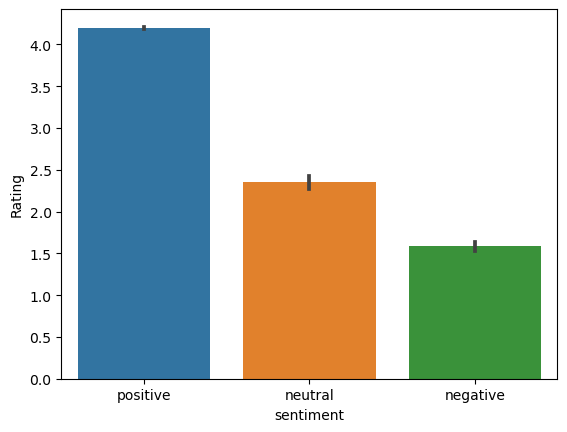

In [17]:
sns.barplot(data = data, x = data['sentiment'], y = data['Rating'])

In [18]:
data['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [19]:
rating_counts  = data['Rating'].value_counts()
rating_counts

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7fa82f3e8bd0>,
 [Text(0.19982756971415777, 1.0816972507971598, '5'),
  Text(-0.9316753506424054, -0.5847914508654783, '4'),
  Text(0.2726145177672828, -1.0656835011871546, '3'),
  Text(0.8337544318741861, -0.7175329590549505, '2'),
  Text(1.0739980347578135, -0.23775664309615957, '1')],
 [Text(0.10899685620772241, 0.5900166822529962, '44.19'),
  Text(-0.5081865548958574, -0.3189771550175336, '29.47'),
  Text(0.14869882787306332, -0.5812819097384478, '10.66'),
  Text(0.4547751446586469, -0.391381614029973, '8.75'),
  Text(0.5858171098678983, -0.1296854416888143, '6.93')])

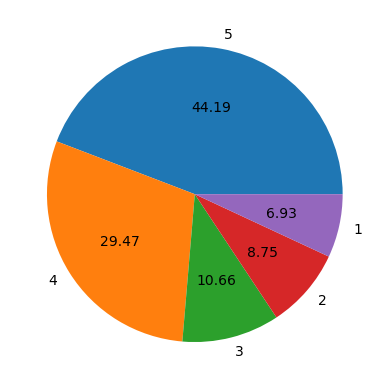

In [20]:
plt.pie(rating_counts, autopct = '%.2f', labels=rating_counts.index)

## Keywords

In [21]:
!pip install yake
import yake

In [22]:
text_corpus = data['Review'].tolist()
language = "en"

keyword_extractor = yake.KeywordExtractor(lan=language, n=1, dedupLim=0.9, dedupFunc="seqm")

# Extract keywords for each document
keywords_list = []
for text in text_corpus:
    keywords = keyword_extractor.extract_keywords(text)
    keywords_list.append([kw for kw, score in keywords])


data["keywords"] = [' '.join(keywords) for keywords in keywords_list]
data["keywords"] = data["keywords"].astype("str").str.replace('\n', ',')

In [23]:
words = []

for x in data.keywords.values:
    x=x.split(' ')
    for i in x:
        words.append(i)


In [24]:
from collections import Counter
word_counter = Counter(words)
word_df = pd.DataFrame(np.array(list(word_counter.items())),columns=["keyword","count"])


In [25]:
word_df["count"] = word_df["count"].astype(int)
word_df = word_df.sort_values(['count'], ascending=False)
top_20 = word_df[0:19]
word_df.head(10)

,keyword,count
3,hotel,13979
2,room,9857
49,great,7743
90,stayed,6270
4,stay,5995
89,staff,5755
8,good,5314
62,location,5022
0,nice,3966
166,rooms,3395


## Dealing with stopwords

In [39]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kanhaiya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kanhaiya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/kanhaiya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
top5 = ["hotel","room","rooms","hotels"]
for x in top5:
    data["Review"] = data["Review"].astype(str).str.replace(x,"")

In [35]:
data2  =  data.copy()
def removing_stopwords(text):
    stopword      = set(stopwords.words('english'))
    word_token     = word_tokenize(text)
    filtered_sent  =  [w for w in word_token if not w in stopword]
    return filtered_sent

data2['Review'] = data2['Review'].apply(removing_stopwords)

In [40]:
lemmatizer = WordNetLemmatizer()
def lemmatize_data(data):
    lema_data = []
    for j in data:
        tokens             = word_tokenize(j)
        lemmatized_tokens  = [lemmatizer.lemmatize(token.lower()) for token in tokens]
        lema_data.append(" ".join(lemmatized_tokens))
    return lema_data

In [41]:
data2['Review'] = data2['Review'].apply(lemmatize_data)

In [42]:
data2["Review"] = data2["Review"].apply(lambda x:" ".join(token for token in x))

In [43]:
data2.head(2)

,S.No.,Review,Rating,sentiment_score,sentiment,keywords
0,1,nice expensive parking got good deal stay anni...,4,0.9747,positive,nice parking room hotel stay night pay expensi...
1,2,ok nothing special charge diamond member hilto...,2,0.9787,positive,room website desk email good hotel breakfast s...


## Word2Vec

In [53]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [57]:
x = data2['Review'].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [59]:
X            =  tokenizer.texts_to_sequences(x)
max_length   =   max([len(x) for x in X])

In [60]:
max_length

1931

## Vocabulary

In [62]:
vocab_size = len(tokenizer.word_index)+1


In [63]:
max_length,  vocab_size

(1931, 48976)

## Padding

In [64]:
from keras.preprocessing.sequence import pad_sequences

In [65]:
X = pad_sequences(X, maxlen = 600, padding = 'post')

In [66]:
labels = ['1', '2', '3', '4', '5']
          
y = data['Rating']
y = y.map({1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           })

## splitting the data

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [73]:
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.models import Sequential
from keras.layers import Embedding

In [81]:
embedding_dim = 16
units = 76

In [82]:
model = tf.keras.Sequential([
    L.Embedding(vocab_size, embedding_dim, input_length=X.shape[1]),
    L.Bidirectional(L.LSTM(units, return_sequences=True)),
    L.Conv1D(64, 3),
    L.MaxPool1D(pool_size=2),
    L.Flatten(),
    L.Dropout(0.2),
    L.Dense(128, activation="relu"),
    L.Dropout(0.2),
    L.Dense(64, activation="relu"),
    L.Dropout(0.2),
    L.Dense(5, activation="softmax")
])

In [83]:
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer='adam',metrics=['accuracy']
             )

In [86]:
history = model.fit(x_train, y_train, epochs=int(5), validation_split=float(0.12), batch_size=int(125), verbose=2)

Epoch 1/5
130/130 - 147s - loss: 1.1387 - accuracy: 0.4890 - val_loss: 0.9195 - val_accuracy: 0.5852 - 147s/epoch - 1s/step
Epoch 2/5
130/130 - 132s - loss: 0.8394 - accuracy: 0.6226 - val_loss: 0.8672 - val_accuracy: 0.6204 - 132s/epoch - 1s/step
Epoch 3/5
130/130 - 130s - loss: 0.6944 - accuracy: 0.7011 - val_loss: 0.9228 - val_accuracy: 0.6159 - 130s/epoch - 1000ms/step
Epoch 4/5
130/130 - 130s - loss: 0.5410 - accuracy: 0.7787 - val_loss: 1.0392 - val_accuracy: 0.6064 - 130s/epoch - 1s/step
Epoch 5/5
130/130 - 131s - loss: 0.4182 - accuracy: 0.8379 - val_loss: 1.2267 - val_accuracy: 0.5847 - 131s/epoch - 1s/step


In [87]:
pred = model.predict(x_test)
pred_final = np.argmax(pred,axis=-1)
pred_final

65/65 [==============================] - 9s 128ms/step


array([0, 4, 2, ..., 4, 1, 4])

## Accuracy score

In [88]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}%'.format(round(accuracy_score(pred_final, y_test)*100),2))

Accuracy: 60%
